### RandomForest


In [1]:
from baseline.models.random_forest import RandomForest

def evaluate_rf(desire, choice_type, num_sample=1000, seed=42):
    print(f'Random Forest:disire-{desire} choice_type-{choice_type}')
    model = RandomForest(data_dir='baseline/data', choice_type=choice_type,
                         desire=desire, sample_num=num_sample, seed=seed)
    model.load_dataset()
    model.prepare_data()
    model.optimize()
    model.train()
    error, kl_divergence = model.evaluate_with_cv(figsize=(20, 3), plot=False)
    _,_,age_error_table = model.get_error_table(x_label='age_group')
    _,_,income_error_table = model.get_error_table(x_label='income_group')
    print('MAPE:', round(error['mean'],2))
    print('KL Divergence:', round(kl_divergence['mean'],2))
    print('=='*20)
    return age_error_table, income_error_table, error, kl_divergence

In [2]:
# evaluate_rf(desire='Recreation', choice_type='amenity')

### XGBoost

In [3]:
from baseline.models.xgboost import XGBoost


def evaluate_xg(desire, choice_type, num_sample=1000, seed=42):
    print(f'XGBoost: disire-{desire} choice_type-{choice_type}')
    model = XGBoost(data_dir='baseline/data',choice_type=choice_type,
                    desire=desire, sample_num=num_sample, seed=seed)
    model.load_dataset()
    model.prepare_data()
    model.optimize()
    model.train()
    error, kl_divergence = model.evaluate_with_cv(figsize=(20, 3), plot=False)
    _,_,age_error_table = model.get_error_table(x_label='age_group')
    _,_,income_error_table = model.get_error_table(x_label='income_group')
    print('MAPE:', round(error['mean'],2))
    print('KL Divergence:', round(kl_divergence['mean'],2))
    print('=='*20)
    return age_error_table, income_error_table, error, kl_divergence

### MLP

In [4]:
from baseline.models.multilayer_perceptron import MLP


def evaluate_mlp(desire, choice_type, num_sample=1000, seed=42):
    print(f'MLP: disire-{desire} choice_type-{choice_type}')
    model = MLP(data_dir='baseline/data',choice_type=choice_type,
                desire=desire, sample_num=num_sample, seed=seed)
    model.load_dataset()
    model.prepare_data()
    model.optimize()
    model.train()
    error, kl_divergence = model.evaluate_with_cv(figsize=(20, 3), plot=False)
    _,_,age_error_table = model.get_error_table(x_label='age_group')
    _,_,income_error_table = model.get_error_table(x_label='income_group')
    print('MAPE:', round(error['mean'],2))
    print('KL Divergence:', round(kl_divergence['mean'],2))
    print('=='*20)
    return age_error_table, income_error_table, error, kl_divergence

### Proposed Method

In [1]:
from model import ChoiceModel

def evaluate_gl(desire, choice_type, num_sample=1000, seed=42):
    print(f'Graph RAG+LLM: disire-{desire} choice_type-{choice_type}')
    choice_model = ChoiceModel(
        data_dir='data', desire=desire, choice_type=choice_type,
        sample_num=num_sample, skip_init=True, seed=seed)

    error, kl_divergence = choice_model.evaluate(figsize=(20, 3), plot=False)

    _,_,age_error_table = choice_model._get_error_table(x_label='age_group')
    _,_,income_error_table = choice_model._get_error_table(x_label='income_group')

    print('MAPE:', round(error['mean'],2))
    print('KL Divergence:', round(kl_divergence['mean'],2))
    print('=='*20)
    return age_error_table, income_error_table, error, kl_divergence

In [13]:
evaluate_gl(desire='Eat',choice_type='mode', num_sample=1000, seed=42)

Graph RAG+LLM: disire-Eat choice_type-mode
MAPE: 5.55
KL Divergence: 0.02


(age_group         Young Adult     Adult  Middle Age     Senior    Elderly
 predict_mode                                                             
 Walking             -9.787234 -2.173913    3.883495   0.000000   2.475248
 Public_transport     2.127660 -3.623188    8.737864  13.253012  11.881188
 Car                  7.659574  5.797101  -12.621359 -13.253012 -14.356436,
 income_group           Debt       Low  Moderate      High  Very High  \
 predict_mode                                                           
 Walking            2.040816 -4.782609 -2.941176  2.727273  -6.896552   
 Public_transport   8.163265  9.565217  3.529412 -7.272727   6.896552   
 Car              -10.204082 -4.782609 -0.588235  4.545455   0.000000   
 
 income_group      Ultra High  
 predict_mode                  
 Walking            -2.105263  
 Public_transport   12.631579  
 Car               -10.526316  ,
 {'age_group': 7.442018987584888,
  'income_group': 5.566618748099658,
  'household_size': 5.961

In [5]:
evaluate_gl(desire='Eat',choice_type='mode', num_sample=100, seed=42)

Graph RAG+LLM: disire-Eat choice_type-mode
MAPE: 7.1
KL Divergence: 0.05


(age_group         Young Adult      Adult  Middle Age    Senior   Elderly
 predict_mode                                                            
 Walking             -0.487805 -15.833333    7.777778 -1.333333  2.272727
 Public_transport    -7.317073   8.333333    4.444444  2.666667  6.818182
 Car                  7.804878   7.500000  -12.222222 -1.333333 -9.090909,
 income_group          Debt       Low  Moderate  High  Very High  Ultra High
 predict_mode                                                               
 Walking           8.235294 -2.395210 -0.787402   3.0 -10.416667  -11.578947
 Public_transport -3.529412 -1.197605  7.874016  -9.0   0.000000   14.736842
 Car              -4.705882  3.592814 -7.086614   6.0  10.416667   -3.157895,
 {'age_group': 6.349067914921575,
  'income_group': 5.983959223207319,
  'household_size': 11.951351033844286,
  'vehicles': 7.148493220536423,
  'family_structure': 4.07833455895227,
  'mean': 7.102241190292375},
 {'age_group': 0.030168699345

# Results

In [6]:
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# plot predict table

def plot_predict_table(desire, choice_type, y_tick=None, x_label='age_group',num_sample=1000, seed=42):
    model = RandomForest(data_dir='baseline/data',choice_type=choice_type,
                desire=desire, sample_num=num_sample, seed=seed)
    
    model.load_dataset()
    model.prepare_data()
    model.optimize()
    model.train()

    predict_tables = model.get_error_table(x_label=x_label)

    choice_model = ChoiceModel(
        data_dir='data', desire=desire, choice_type=choice_type,
        sample_num=num_sample, skip_init=True, seed=seed)

    choice_predict_tables = choice_model._get_error_table(x_label=x_label)

    fig, axs = plt.subplots(2, 3, figsize=(20,6), sharex=True, sharey=True)

    table_names = ['Ground Truth', 'Prediction', 'Absolute Percentage Error']
    for i in range(3):
        for j,table in enumerate([predict_tables, choice_predict_tables]):
            ax = axs[j,i]
            vmax = 60 if i <= 1 else 30
            sns.heatmap(table[i].abs(), annot=True, fmt=".0f",cbar=False,
                        cmap="Blues", vmin=0, vmax=vmax, ax=ax,annot_kws={"size": 15})
            ax.set_xlabel("")
            ax.set_ylabel("")
            ax.set_xticklabels(ax.get_xticklabels(), rotation=0,fontsize=15)
            if j == 0:
                ax.set_title(table_names[i]+' (RF)',fontweight='bold',fontsize=20,)
            else:
                ax.set_title(table_names[i]+' (GL)',fontweight='bold',fontsize=20,)
            if y_tick:
                ax.set_yticklabels(y_tick, fontsize=15)
    plt.tight_layout()
    plt.savefig(f'results/predict_table({x_label}).png')
    plt.show()

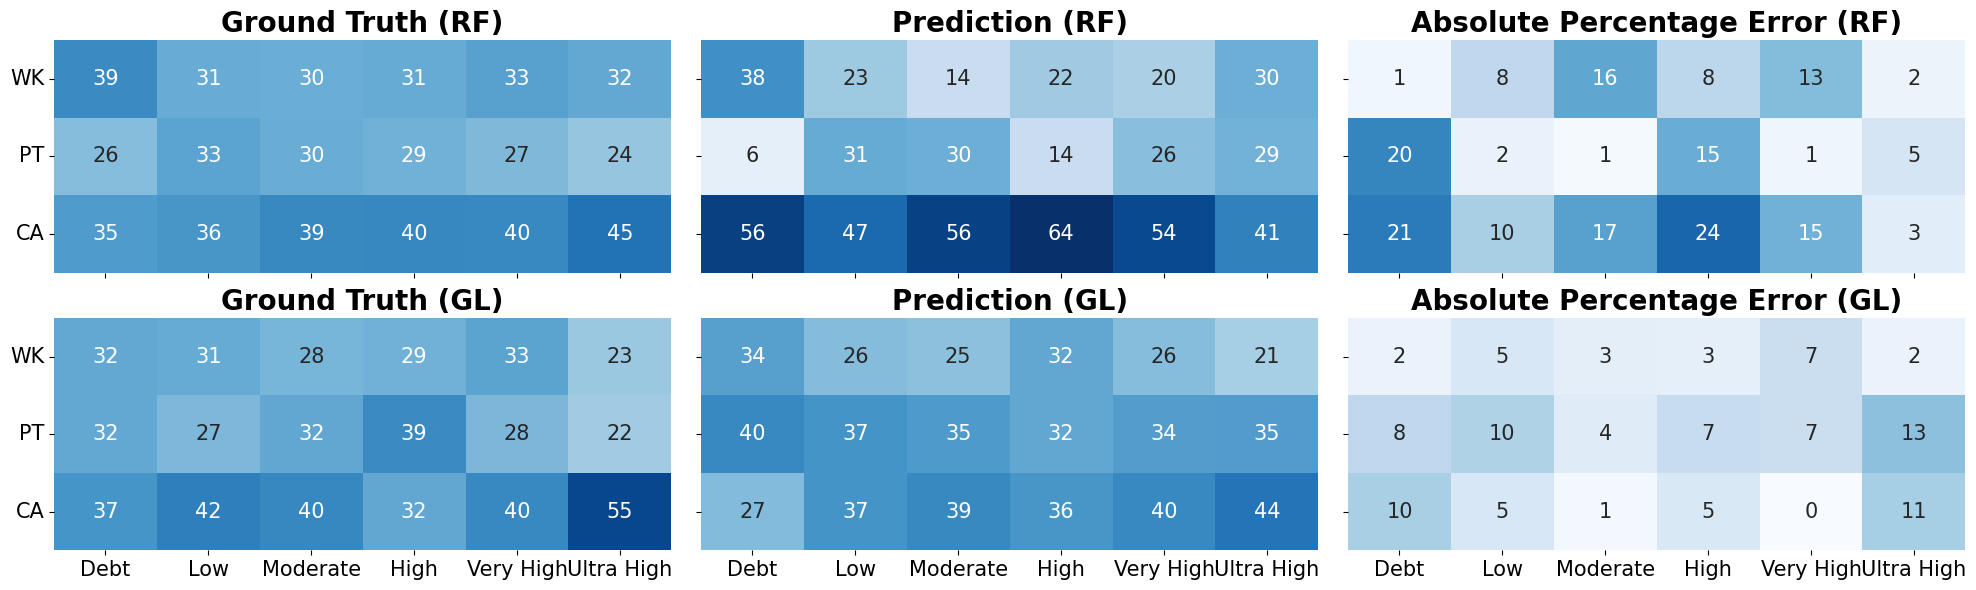

In [8]:
plot_predict_table(desire='Eat', choice_type='mode', x_label='income_group', y_tick=['WK','PT','CA'])

In [9]:
# eval
def evaluate(desire, choice_type):
    columns = ['model', 'desire', 'num_sample', 'choice_type',
           'MAPE','KLD']
    df = pd.DataFrame(columns=columns)
    error_tables = {}
    # evaluate_rf 
    age_error_table, income_error_table, error, kl_divergence = evaluate_rf(desire, choice_type, num_sample=1000, seed=42)
    error_tables['RF'] = {'age': age_error_table.abs(), 'income': income_error_table.abs()}
    df.loc[len(df)] = ['RF', desire, 1000, choice_type,error['mean'], kl_divergence['mean']]

    # evaluate_xg
    age_error_table, income_error_table, error, kl_divergence = evaluate_xg(desire, choice_type, num_sample=1000, seed=42)
    error_tables['XG'] = {'age': age_error_table.abs(), 'income': income_error_table.abs()}
    df.loc[len(df)] = ['XG', desire, 1000, choice_type,error['mean'], kl_divergence['mean']]

    # evaluate_mlp
    age_error_table, income_error_table, error, kl_divergence = evaluate_mlp(desire, choice_type, num_sample=1000, seed=42)
    error_tables['MLP'] = {'age': age_error_table.abs(), 'income': income_error_table.abs()}
    df.loc[len(df)] = ['MLP', desire, 1000, choice_type,error['mean'], kl_divergence['mean']]

    # evaluate_gl
    age_error_table, income_error_table, error, kl_divergence = evaluate_gl(desire, choice_type, num_sample=1000, seed=42)
    error_tables['GL'] = {'age': age_error_table.abs(), 'income': income_error_table.abs()}
    df.loc[len(df)] = ['GL', desire, 1000, choice_type,error['mean'], kl_divergence['mean']]
    df['MAPE'] = df['MAPE'].apply(lambda x: round(x,2))
    df['KLD'] = df['KLD'].apply(lambda x: round(x,2))
    return df, error_tables

# plot

def combined_plot(error_tables_list, desires, y_ticks=None, x_ticks=None, group='age', filename=None):
    n_models = len(error_tables_list[0].keys())  # number of models in each table
    fig, axes = plt.subplots(len(error_tables_list), n_models, figsize=(20, 8))
    for k, (error_tables, desire, y_tick) in enumerate(zip(error_tables_list, desires,y_ticks)):
        for i, model in enumerate(error_tables.keys()):
            ax = axes[k,i]
            # format as int
            sns.heatmap(error_tables[model][group], annot=True, ax=ax, cmap="Blues", fmt=".0f",
                        vmin=0, vmax=30, cbar=False, annot_kws={"size": 15})
            ax.set_xlabel("")
            ax.set_ylabel("")
            if k == len(error_tables_list)-1:
                ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=15)
                if x_ticks:
                    ax.set_xticklabels(x_ticks, rotation=0, fontsize=15)
            else:
                ax.set_xticklabels('')
            if k ==0 :
                ax.set_title(f'{model}', fontsize=20, fontweight='bold')
            if i == 0:
                ax.set_ylabel(desire, fontsize=20, fontweight='bold')
                if y_tick:
                    ax.set_yticklabels(y_tick, fontsize=15)
            else:
                ax.set_yticklabels('')
            
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

# group df
def group_df(df):
    # Pivot the data to create a grouped table with 'desire' and 'metrics'
    pivot_df = df.melt(id_vars=['desire', 'model'], value_vars=['MAPE', 'KLD'], 
                    var_name='Metrics', value_name='Value')
    pivot_df['desire'] = pd.Categorical(pivot_df['desire'], categories=['Eat', 'Shop', 'Recreation'], ordered=True)
    # Reorganize the table to get a grouped format with models as columns
    grouped_df = pivot_df.pivot_table(
        index=['desire', 'Metrics'], columns='model', values='Value'
    ).reset_index()
    grouped_df = grouped_df[['desire', 'Metrics', 'RF', 'MLP', 'XG', 'GL']]
    return grouped_df

## Mobility Choice

In [10]:
print("Start evaluation: choice_type = mode")
eat_mode_df,eat_mode_error_tables = evaluate(desire='Eat', choice_type='mode')
shop_mode_df,shop_mode_error_tables = evaluate(desire='Shop', choice_type='mode')
recreation_mode_df,recreation_mode_error_tables = evaluate(desire='Recreation', choice_type='mode')

Start evaluation: choice_type = mode
Random Forest:disire-Eat choice_type-mode
MAPE: 10.79
KL Divergence: 0.09
XGBoost: disire-Eat choice_type-mode
MAPE: 15.19
KL Divergence: 0.19
MLP: disire-Eat choice_type-mode
MAPE: 14.96
KL Divergence: 0.6
Graph RAG+LLM: disire-Eat choice_type-mode
MAPE: 5.55
KL Divergence: 0.02
Random Forest:disire-Shop choice_type-mode
MAPE: 7.04
KL Divergence: 0.05
XGBoost: disire-Shop choice_type-mode
MAPE: 10.08
KL Divergence: 0.15
MLP: disire-Shop choice_type-mode
MAPE: 6.97
KL Divergence: 0.05
Graph RAG+LLM: disire-Shop choice_type-mode
MAPE: 5.15
KL Divergence: 0.02
Random Forest:disire-Recreation choice_type-mode
MAPE: 11.74
KL Divergence: 0.25
XGBoost: disire-Recreation choice_type-mode
MAPE: 15.34
KL Divergence: 0.32
MLP: disire-Recreation choice_type-mode
MAPE: 16.15
KL Divergence: 0.8
Graph RAG+LLM: disire-Recreation choice_type-mode
MAPE: 6.96
KL Divergence: 0.03


In [11]:
mobility_df = pd.concat([eat_mode_df, shop_mode_df, recreation_mode_df])
mobility_df = group_df(mobility_df)
mobility_df.to_csv('results/mobility_choice.csv', index=False)
mobility_df

model,desire,Metrics,RF,MLP,XG,GL
0,Eat,KLD,0.09,0.60,0.19,0.02
1,Eat,MAPE,10.79,14.96,15.19,5.55
2,Shop,KLD,0.05,0.05,0.15,0.02
3,Shop,MAPE,7.04,6.97,10.08,5.15
4,Recreation,KLD,0.25,0.80,0.32,0.03
5,Recreation,MAPE,11.74,16.15,15.34,6.96


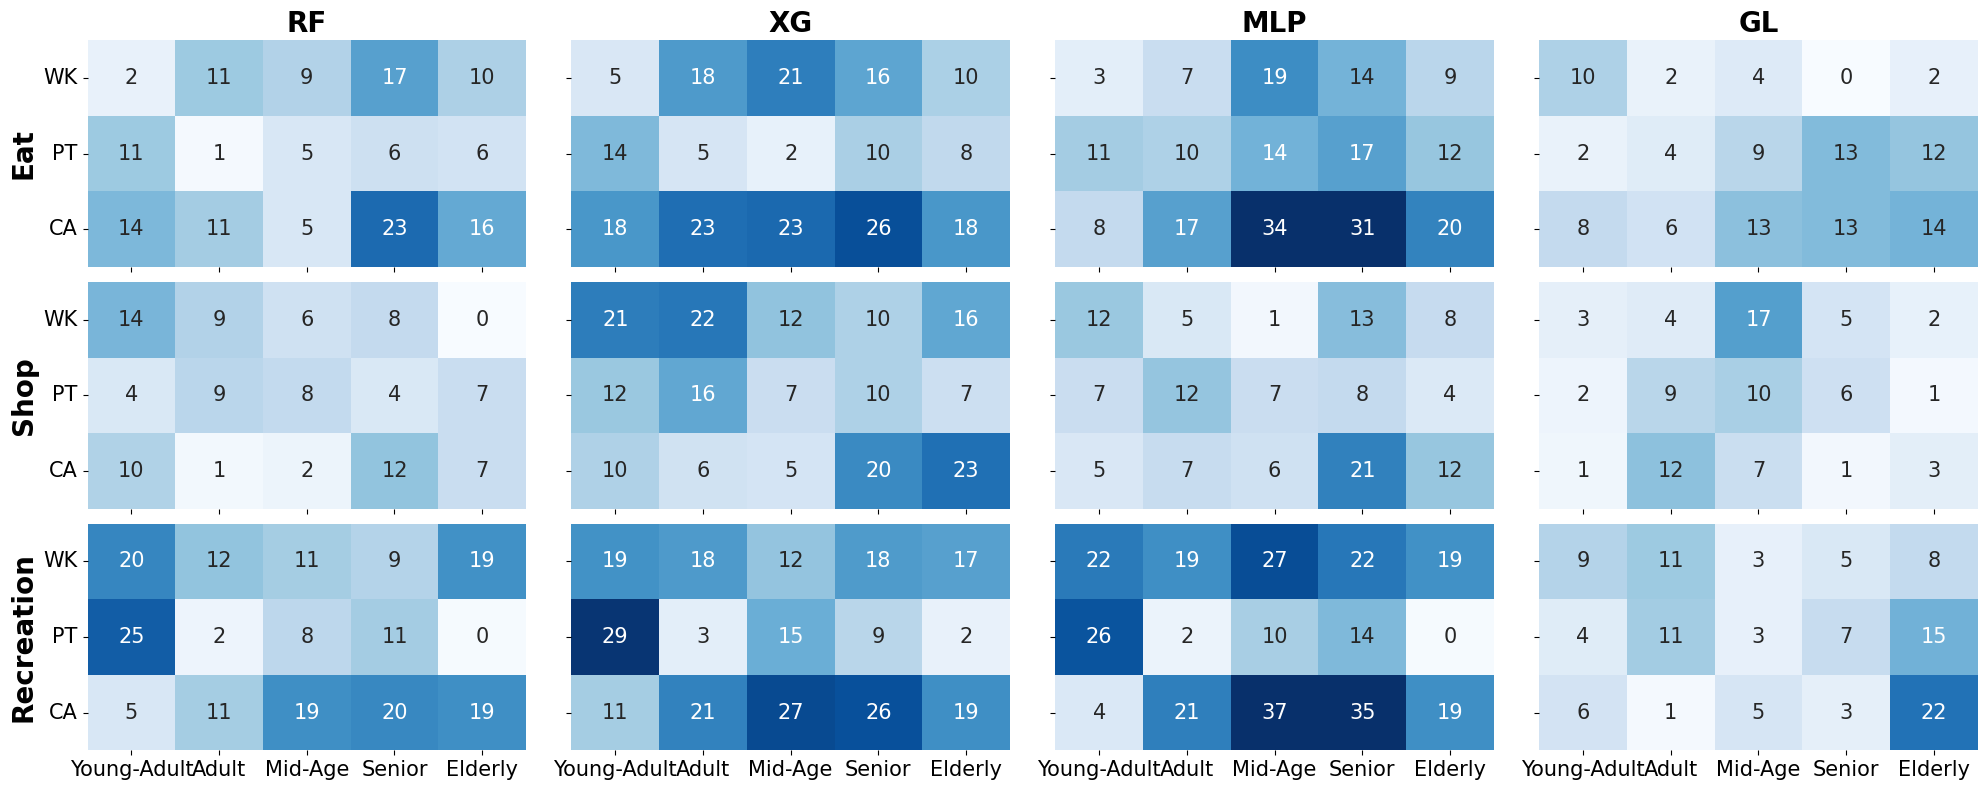

In [12]:
# Provide the error tables and corresponding desires
error_tables_list = [eat_mode_error_tables, shop_mode_error_tables, recreation_mode_error_tables]
desires = ['Eat', 'Shop', 'Recreation']
x_ticks = ['Young-Adult', 'Adult', 'Mid-Age', 'Senior', 'Elderly']
y_ticks = [['WK', 'PT', 'CA'],['WK', 'PT', 'CA'],['WK', 'PT', 'CA']]
combined_plot(error_tables_list, desires, y_ticks, x_ticks=x_ticks, group='age',filename='results/mobility_choice(age).png')

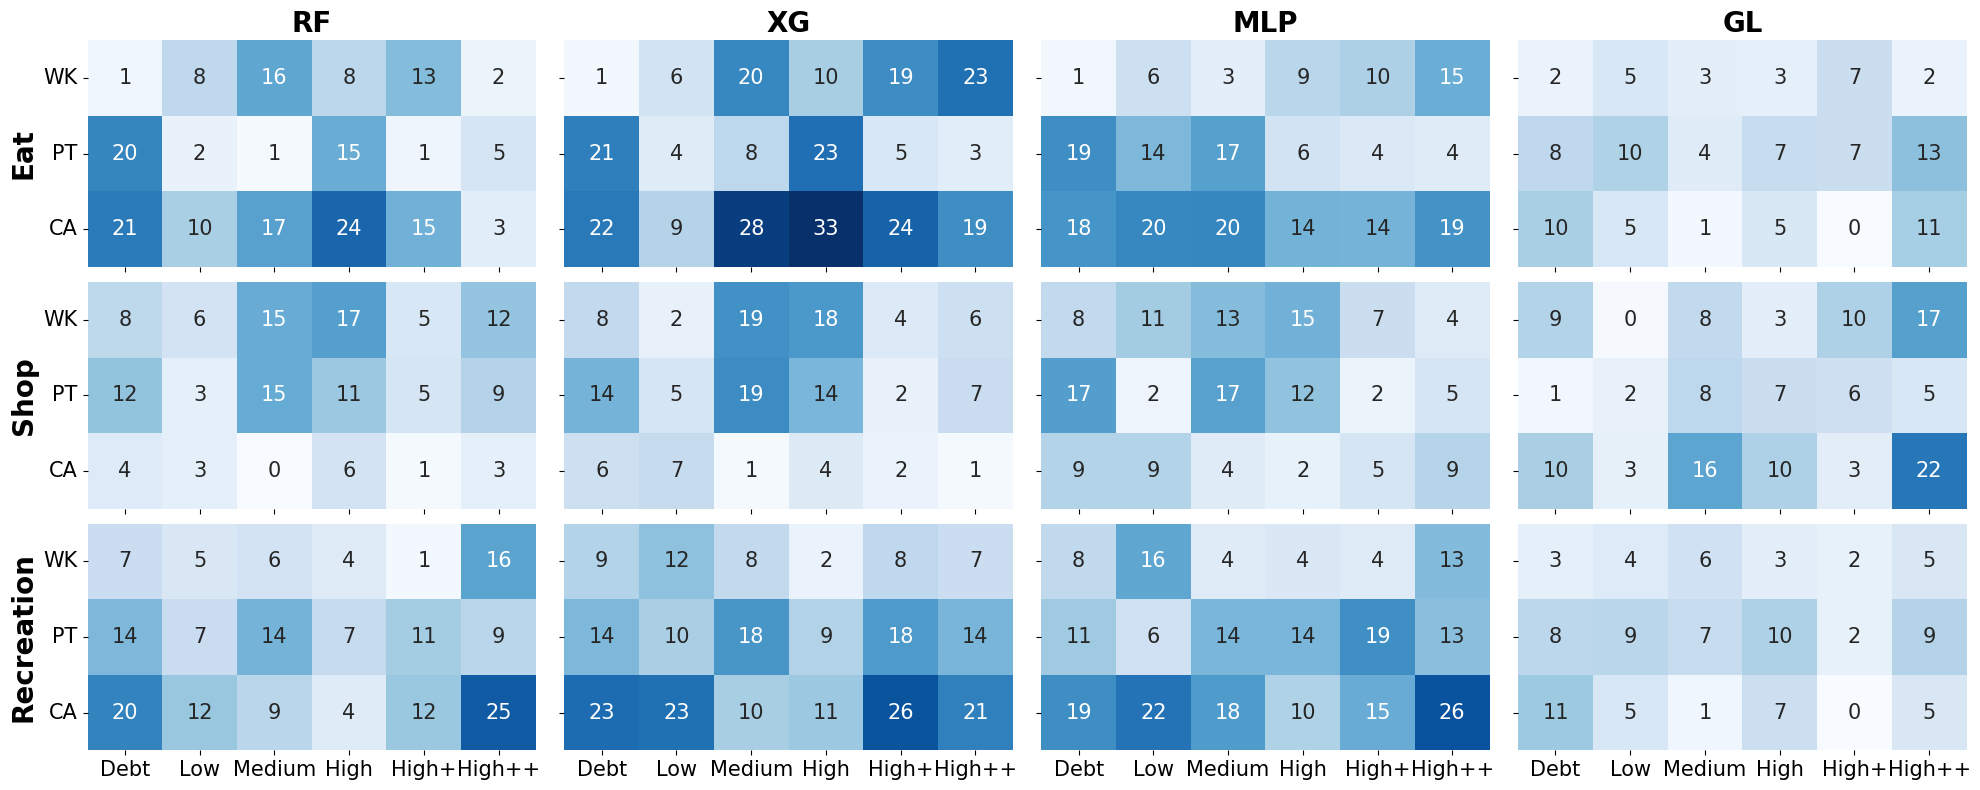

In [13]:
x_ticks = ['Debt', 'Low', 'Medium', 'High', 'High+','High++']
y_ticks = [['WK', 'PT', 'CA'],['WK', 'PT', 'CA'],['WK', 'PT', 'CA']]
combined_plot(error_tables_list, desires, y_ticks=y_ticks, x_ticks=x_ticks, group='income',filename='results/mobility_choice(income).png')

## Amenity Choice

In [14]:
print("Start evaluation: choice_type = amenity")
eat_amenity_df,eat_amenity_error_tables = evaluate(desire='Eat', choice_type='amenity')
shop_amenity_df,shop_amenity_error_tables = evaluate(desire='Shop', choice_type='amenity')
recreation_amenity_df,recreation_amenity_error_tables = evaluate(desire='Recreation', choice_type='amenity')

Start evaluation: choice_type = amenity
Random Forest:disire-Eat choice_type-amenity
MAPE: 17.44
KL Divergence: 1.79
XGBoost: disire-Eat choice_type-amenity
MAPE: 21.42
KL Divergence: 2.87
MLP: disire-Eat choice_type-amenity
MAPE: 25.95
KL Divergence: 9.89
Graph RAG+LLM: disire-Eat choice_type-amenity
MAPE: 7.19
KL Divergence: 0.07
Random Forest:disire-Shop choice_type-amenity
MAPE: 9.6
KL Divergence: 0.1
XGBoost: disire-Shop choice_type-amenity
MAPE: 19.7
KL Divergence: 0.61
MLP: disire-Shop choice_type-amenity
MAPE: 28.0
KL Divergence: 8.04
Graph RAG+LLM: disire-Shop choice_type-amenity
MAPE: 7.49
KL Divergence: 0.05
Random Forest:disire-Recreation choice_type-amenity
MAPE: 8.15
KL Divergence: 0.09
XGBoost: disire-Recreation choice_type-amenity
MAPE: 12.41
KL Divergence: 0.34
MLP: disire-Recreation choice_type-amenity
MAPE: 6.51
KL Divergence: 0.07
Graph RAG+LLM: disire-Recreation choice_type-amenity
MAPE: 8.31
KL Divergence: 0.1


In [15]:
amenity_df = pd.concat([eat_amenity_df, shop_amenity_df, recreation_amenity_df])
amenity_df = group_df(amenity_df)
amenity_df.to_csv('results/amenity_choice.csv', index=False)
amenity_df

model,desire,Metrics,RF,MLP,XG,GL
0,Eat,KLD,1.79,9.89,2.87,0.07
1,Eat,MAPE,17.44,25.95,21.42,7.19
2,Shop,KLD,0.10,8.04,0.61,0.05
3,Shop,MAPE,9.60,28.00,19.70,7.49
4,Recreation,KLD,0.09,0.07,0.34,0.10
5,Recreation,MAPE,8.15,6.51,12.41,8.31


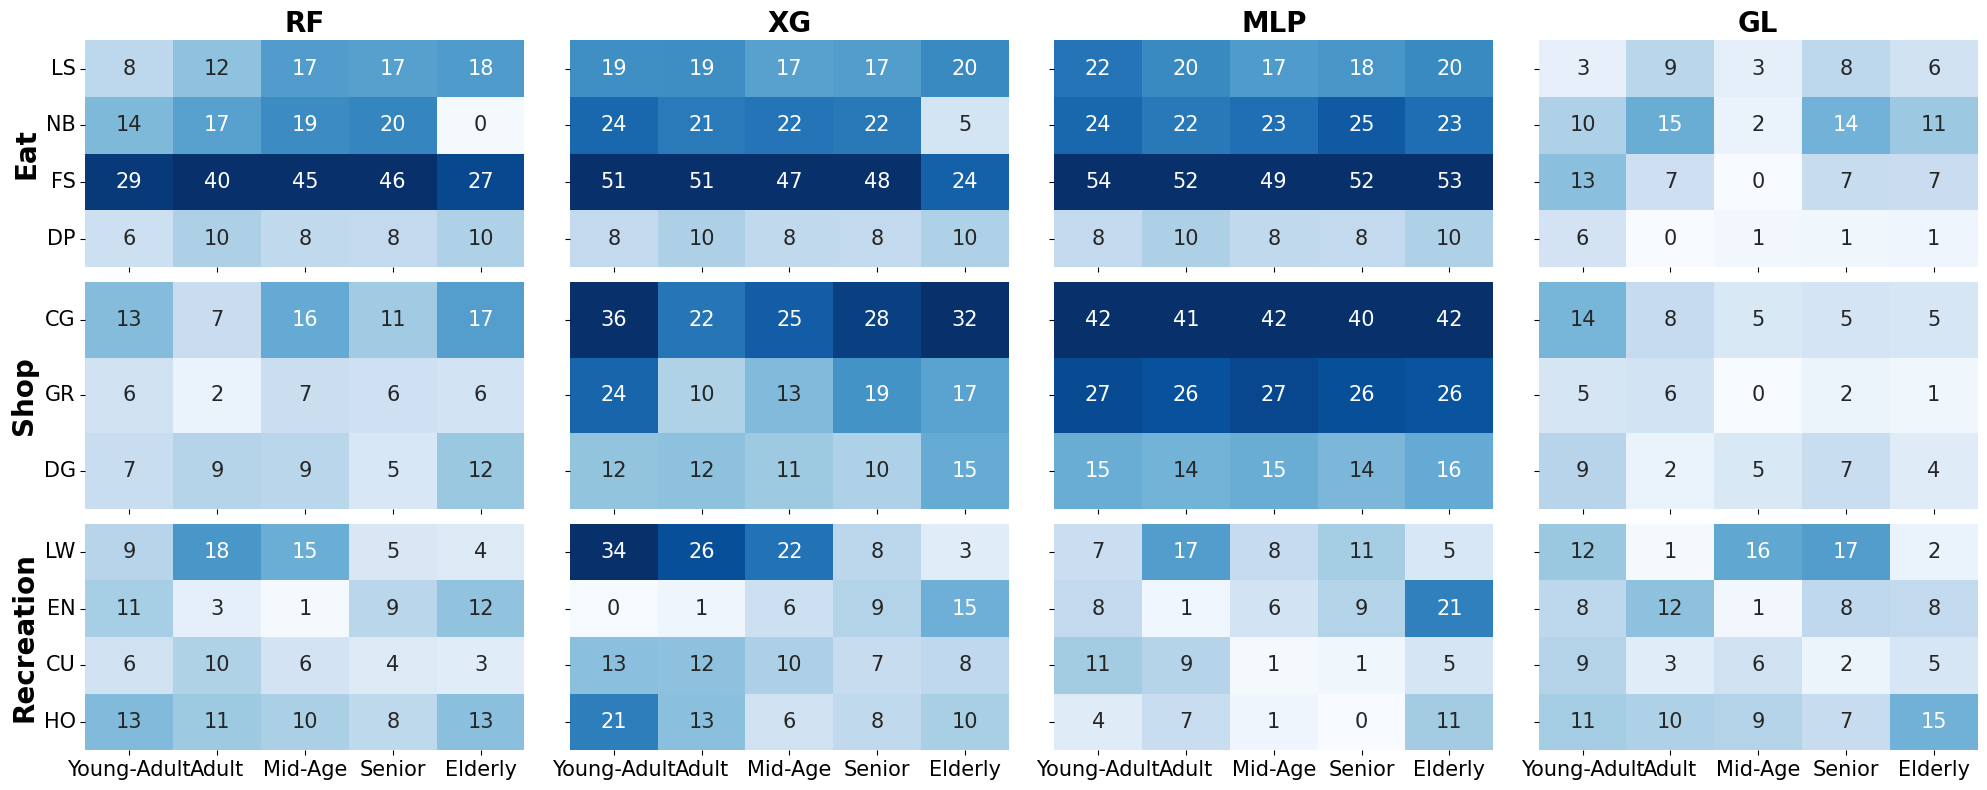

In [16]:
# Provide the error tables and corresponding desires
error_tables_list = [eat_amenity_error_tables, shop_amenity_error_tables, recreation_amenity_error_tables]
desires = ['Eat', 'Shop', 'Recreation']
# y_ticks = [['Limited-Service Restaurants','Nonalcoholic Bars','Full-Service Restaurants', 'Drinking Places'],
#            ['Consumer Goods','Grocery','Durable Goods'],
#            ['Leisure & Wellness','Entertainment','Cultural','Hotel']]
y_ticks = [['LS','NB','FS', 'DP'],
           ['CG','GR','DG'],
           ['LW','EN','CU','HO']]
x_ticks = ['Young-Adult', 'Adult', 'Mid-Age', 'Senior', 'Elderly']
combined_plot(error_tables_list, desires, y_ticks=y_ticks,x_ticks=x_ticks, group='age',filename='results/amenity_choice(age).png')

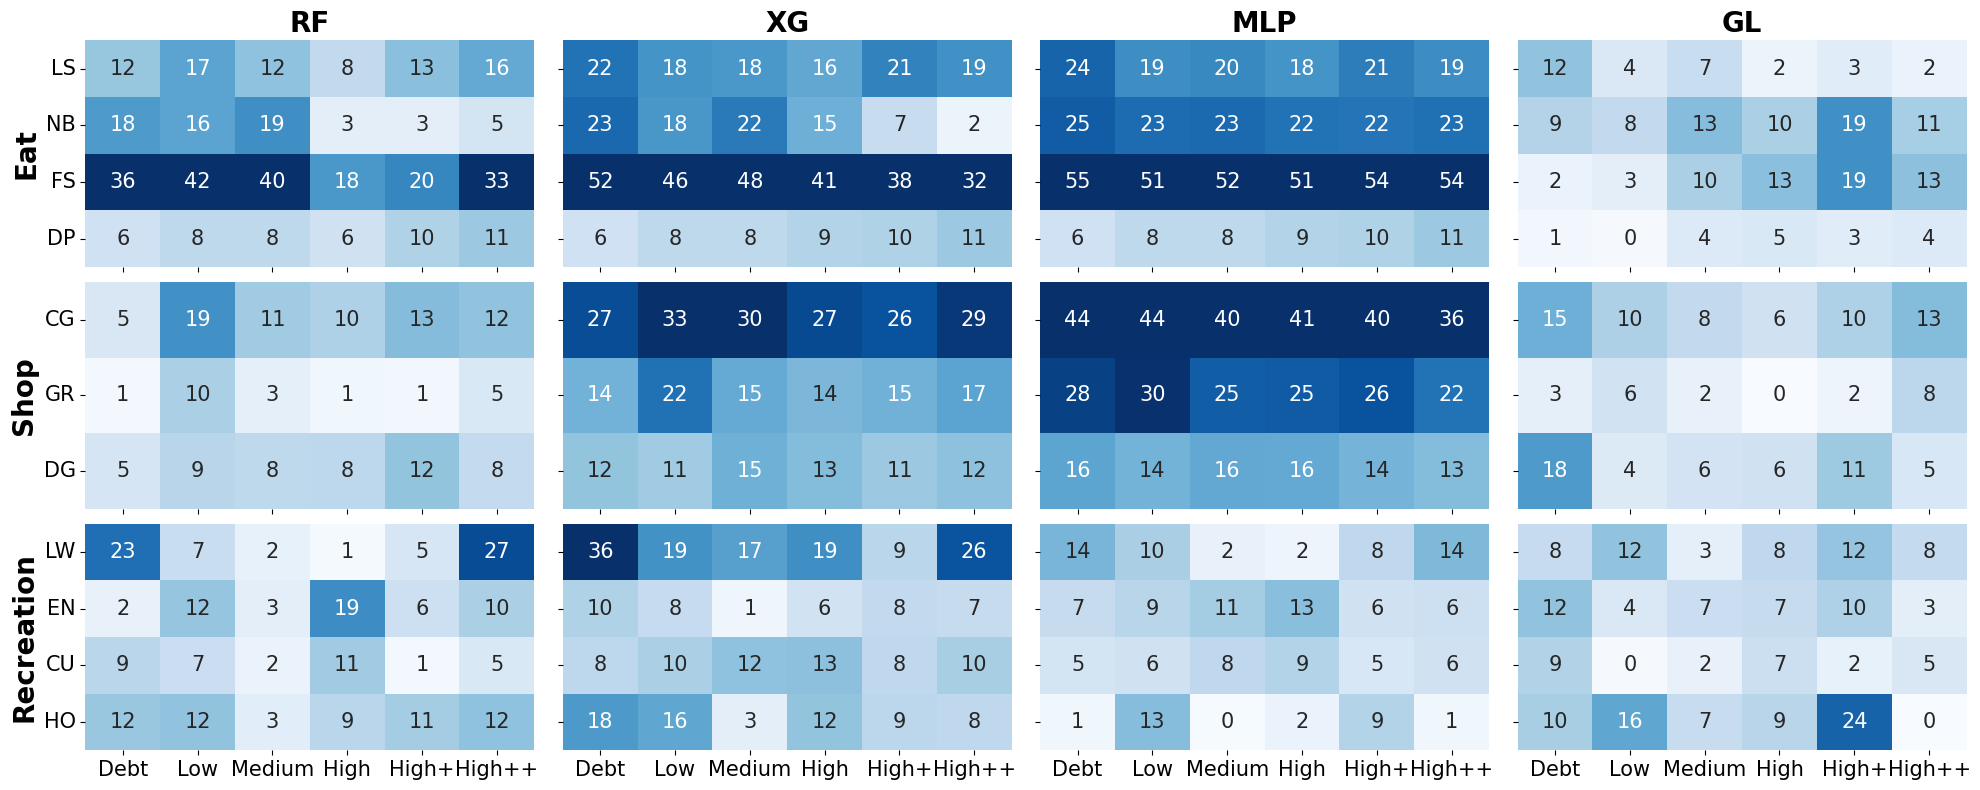

In [17]:
x_ticks = ['Debt', 'Low', 'Medium', 'High', 'High+','High++']
combined_plot(error_tables_list, desires, y_ticks, x_ticks=x_ticks, group='income',filename='results/amenity_choice(income).png')